In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, accuracy_score

In [2]:
def get_model():
    logged_model = '../saved_model_for_interpretability'

    model = tf.keras.models.load_model(logged_model)
    return model

In [3]:
model = get_model()

2022-04-20 08:04:45.253679: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
data_dir = 'final_validation_data/'

In [5]:
!find $data_dir  -name ._\* -delete
!find $data_dir  -name .DS\* -delete

---
---
---
# Global analysis

In [6]:
def build_dataset():
      return tf.keras.preprocessing.image_dataset_from_directory(
          data_dir,
          label_mode="categorical",
          image_size=(384, 384),
          batch_size=1)
    
ds_images = build_dataset()
#classes = ds_images.class_names
classes = ['bathroom', 'bedroom', 'dinning', 'frontal', 'kitchen', 'livingroom']

# Hemos incluido la normalización (Resize y Rescaling) como capas dentro del modelo.
# normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1. / 255)
# ds_images = ds_images.map(lambda images, labels: (normalization_layer(images), labels))

Found 74 files belonging to 6 classes.


In [7]:
y_pred = []
y_true = []
for x, y in ds_images:
    image = x[0, :, :, :]
#     plt.imshow(image)
    y_pred.append(classes[np.argmax(model.predict(np.expand_dims(image, axis=0)))])
    y_true.append(classes[np.argmax(y[0])])

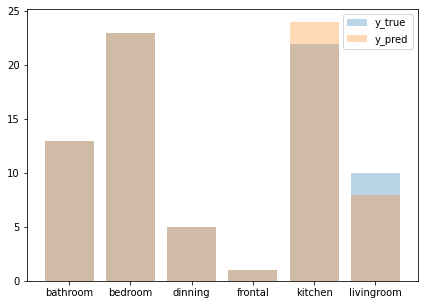

In [8]:
y_true_freqs = np.unique(y_true, return_counts=True)
y_pred_freqs = np.unique(y_pred, return_counts=True)

fig, ax = plt.subplots(figsize = (7, 5))
ax.bar(y_true_freqs[0], y_true_freqs[1], alpha = 0.3, label = 'y_true')
ax.bar(y_pred_freqs[0], y_pred_freqs[1], alpha = 0.3, label = 'y_pred')
ax.legend()

Accuracy: 0.9324324324324325
F1 score: [1.         0.91304348 0.8        1.         0.95652174 0.88888889]
Precision: [1.         0.91304348 0.8        1.         0.91666667 1.        ]
Recall: [1.         0.91304348 0.8        1.         1.         0.8       ]


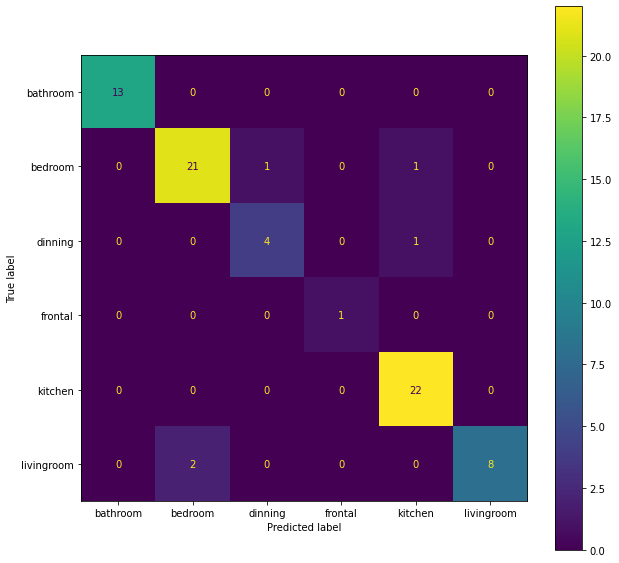

In [9]:
print('Accuracy:', accuracy_score(y_true, y_pred))
print('F1 score:', f1_score(y_true, y_pred, average=None))
print('Precision:', precision_score(y_true, y_pred, average=None))
print('Recall:', recall_score(y_true, y_pred, average=None))

fig, ax = plt.subplots(figsize=(10,10))
cm = confusion_matrix(y_true, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
disp.plot(ax=ax)
plt.show()